# 1 Author

**Student Name**:  Ashokan Palanivel

**Student ID**:  230174090

# 2 Problem formulation

In this exercise, our objective is to develop a solution that can accurately determine whether a given image contains 'rice' or 'chips'.

# 3 Machine Learning pipeline

1) Installation of Necessary Libraries & Data Import and Mounting Drive

2) Data Cleaning and Preprocessing

3) Feature Engineering

4) Label Encoding

5) Train-Test Split

6) Feature Extraction:

For the feature extraction process, resizing the images is a necessary step. Due to the time-consuming nature of this task, I have pre-resized all 3250 images and stored them on Google Drive. I will access these images using their filenames from the dataset to perform the required feature extraction.

7) Data Transformation and Scaling

8) Model Selection & Training the Model

9) Model Evaluation

10) Save the trained model for later use or deployment

11) Interpret the model's predictions and report the results

# 4 Transformation stage

**Text Processing:**

Utilizing regular expressions to identify keywords in the ingredients text to create a new categorical feature that indicates whether the food item is 'rice' or 'chips'.

**Label Encoding:**

Transforming the categorical labels (e.g., 'rice', 'chips') into numerical values that a machine learning model can understand and process.

**# Image Feature Extraction:**

**Color Moments:**

Calculating statistical measures of color within an image, like the mean, variance, and skewness for each color channel.

**Yellow Component Extraction:**

Isolating the yellow color component from images, which might be particularly useful for distinguishing certain food items.

**Texture Features:**

Using gray-level co-occurrence matrix (GLCM) to extract texture features from the images.

**HOG Features:**

Calculating Histogram of Oriented Gradients (HOG) descriptors that capture the structure or shape of objects within the images.

**Feature Vector Creation:**

Combining all extracted features (color moments, yellow component, GLCM properties, HOG features) into a single feature vector for each image.

**Scaling of Features :**

Standardizing or normalizing the feature vectors so that they contribute equally to the distance calculations in the model, which is particularly important for algorithms like SVC.

**Train-Test Split:**

Dividing the dataset into training and testing subsets, ensuring that the model can be trained on one set of data and validated on another to test its ability to generalize.

In [68]:
!pip install mlend

In [69]:
# 1) Installation of Necessary Libraries & Data Import and Mounting Drive

from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from skimage import transform, util
import random

from skimage import feature
from sklearn.feature_extraction.text import TfidfVectorizer

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# 2) Data Cleaning and Preprocessing
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv')
import re
MLENDYD_df['Rice_Chips'] = None
input_check = ['rice','chips','fries']
pattern = '|'.join(re.escape(string) for string in input_check)
#check if rice and chips are mentioned in the ingrediants
for i,j in MLENDYD_df.iterrows():
  sentence = str(j[6])
  matches = re.findall(pattern, sentence, re.IGNORECASE)
  if matches:
    if 'rice' in matches:
      MLENDYD_df.loc[i,'Rice_Chips'] = 'rice'
    else:
      MLENDYD_df.loc[i,'Rice_Chips'] = 'chips'

MLENDYD_df.dropna(inplace=True)
df = pd.concat([MLENDYD_df[MLENDYD_df['Rice_Chips']=='rice'].sample(70,random_state=42),MLENDYD_df[MLENDYD_df['Rice_Chips']=='chips'].sample(77,random_state=42)])
df

,filename,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Rice_Chips
1437,001438.jpg,non_vegetarian,asian,asian,sushi,restaurant,"rice,water,chicken,chilli_sauce,panko_bread_cr...",unhealthy,2.0,like,4.0,Train,rice
2901,002902.jpg,non_vegetarian,arab,arab,vegtable_curry_with_rice_and_fish,home,"rice,fish,mixed_spices,courgette,carrot,okra",neutral,3.0,neutral,3.0,Train,rice
2179,002180.jpg,vegetarian,indian,indian,potato-stuffed_crepe_with_lentil_stew,home,"rice,black_gram_lentils,fenugreek_seeds,split_...",very_healthy,5.0,strongly_like,5.0,Train,rice
645,000646.jpg,non_vegetarian,chinese,chinese,sanbao_rice,mama_li,"duck,chicken,pork,rice,pak_choi,garlic,",healthy,4.0,strongly_like,5.0,Test,rice
3097,003098.jpg,vegetarian,indian,indian,vegetable_pilao_rice,home,"basmati_rice,potato,carrot,garden_peas,onions,...",healthy,4.0,like,4.0,Train,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,000835.jpg,vegetarian,belgian,belgian,cup_cake,restaurant,"wheat,yeast,choc_chips,egg,sugar",unhealthy,2.0,neutral,3.0,Train,chips
2605,002606.jpg,non_vegetarian,english,english,fish_and_chips,restaurant,"cod,chips",unhealthy,2.0,like,4.0,Train,chips
3123,003124.jpg,non_vegetarian,lebanese,lebanese,chicken_shawarma_wrap,shawarma,"flour_tortilla,chicken,olive_oil,coriander,cum...",neutral,3.0,strongly_like,5.0,Train,chips
521,000522.jpg,non_vegetarian,british,british,steak,restaurant,"chips,steak,tomato,onion,gravy",unhealthy,2.0,strongly_like,5.0,Train,chips


In [71]:
# Encode the target variable Rice_Chips using lable encoder
le = LabelEncoder()
labels = le.fit_transform(df['Rice_Chips'])
predictors = ['filename', 'Ingredients','Healthiness_rating_int','Likeness_int','Dish_name','Home_or_restaurant']
X_train, X_test, y_train, y_test = train_test_split(df[predictors], labels, test_size=0.3, random_state=42)
# Since the resizing of the images for each run taking lot of time, I have resized all the 3250 images at once and stored them in the below locatio.
# I'll fetch the images from the stored folder whenever necessary
resized_file = '/content/drive/MyDrive/Data/MLEnd/final_image/'

In [72]:
# Feature extraction
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import skew
import numpy as np
from skimage.color import rgb2hsv
from skimage.color import rgb2gray
from skimage.measure import label
import cv2

def color_moments(image):
    # Convert image to float type for moments calculation
    image = image.astype('float32')
    moments = []
    for i in range(3):
        channel = image[:, :, i]
        moments.extend([channel.mean(), channel.var(), skew(channel.flatten())])
    return moments

def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2

def get_hog_features(img):
    if img.dtype != np.uint8:
      img = (img * 255).astype(np.uint8)
    img = np.array(img)
    # Convert to grayscale if not already
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Use HOG for feature extraction
    hog_features = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    return hog_features

def image_feature_extraction(image):
  color_moments_features = color_moments(image)
  f1,f2 = GMLC_features(image)
  # Example for yellow component - adjust the range as needed
  yellow_component = get_yellow_component(image, 27, 33)
  h_features = get_hog_features(image)
  # features = color_moments_features + glcm_features + [yellow_component]
  features = [f1,f2, yellow_component] + h_features.tolist() + color_moments_features

  return features

In [73]:
# Functions to resize any images to 200*200
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])


In [74]:
# This step uses list comprehension to fetch image paths for train and test data.
X_train_f = []
X_train_f = np.array([image_feature_extraction(plt.imread(resized_file+r)) for i,r in enumerate(X_train['filename'])])
print(X_train_f.shape)

X_test_f = []
X_test_f = np.array([image_feature_extraction(plt.imread(resized_file+r)) for i,r in enumerate(X_test['filename'])])
print(X_test_f.shape)

(102, 20748)
(45, 20748)


# 5 Modelling

**RandomForest**

RandomForest is an ensemble learning method for classification (and regression) that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees.

**SVC (Support Vector Classifier)**

SVC is a powerful, non-linear classification technique that works well on a wide range of datasets, which is particularly useful for small to medium-sized datasets. It constructs hyperplanes in a multidimensional space that separates cases of different class labels


The reason for using RandomForest and SVC are based on the nature of the image data after feature extraction. Since the extracted features are numerous and create complex and high-dimensional data, both RandomForest and SVC are capable of handling such scenarios. Moreover, if there is uncertainty about whether the relationship between the features and the target variable is linear, both models are capable of capturing non-linear relationships.

# 6 Methodology


 I have fit my models to the training data(this involves the models learning to classify images based on the features provided) and validate on test data(This is crucial to ensure that the model generalizes well to new, unseen data).

 Below are the performance metrics I used to asses my model.

 **Accuracy:** Calculate the accuracy of the model, which is the proportion of correctly predicted instances out of all predictions. It gives you a general idea of how often the model is correct.

 **Confusion Matrix:** A confusion matrix is a table that is often used to describe the performance of a classification model. It provides insights into the types of errors the model is making.

 **Precision, Recall, and F1-Score:** These metrics provide more detail than simple accuracy. Precision measures the accuracy of positive predictions. Recall (or sensitivity) measures the fraction of positives that were correctly identified. The F1-score is a weighted harmonic mean of precision and recall.

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65        21
           1       0.70      0.67      0.68        24

    accuracy                           0.67        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.67      0.67      0.67        45



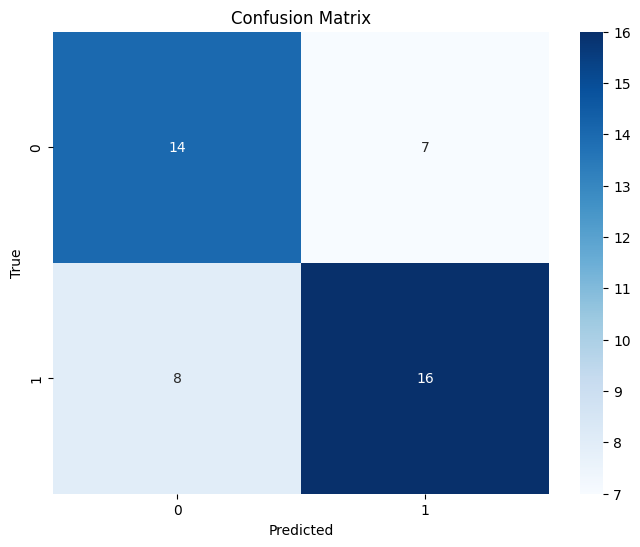

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the model
clf.fit(X_train_f, y_train)

# Make predictions and evaluate the model
predictions = clf.predict(X_test_f)

# Confusion Matrix calculation
cm = confusion_matrix(y_test, predictions)

# Classification Report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64        21
           1       0.68      0.62      0.65        24

    accuracy                           0.64        45
   macro avg       0.65      0.65      0.64        45
weighted avg       0.65      0.64      0.64        45



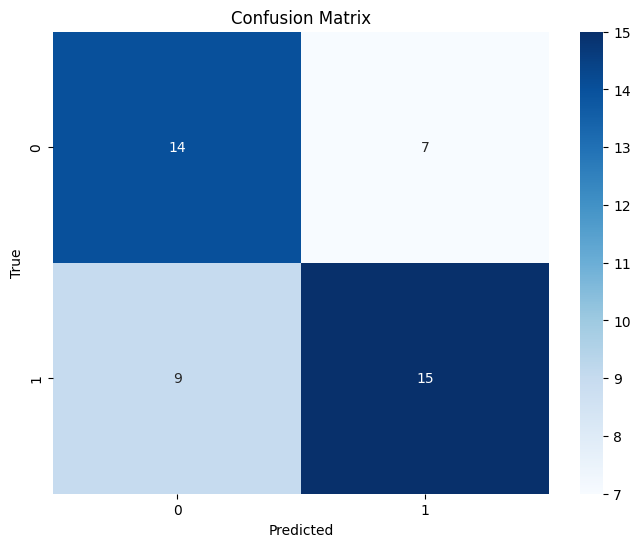

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_f)
X_test_scaled = scaler.transform(X_test_f)

# Creating and training the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
y_pred = rf_classifier.predict(X_test_scaled)

# Generating classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 7 Dataset

I downloaded the dataset through the yummy_load function, which comprises approximately 3250 samples. A new column titled 'Rice_Chips' was generated using information from the 'Ingredients' column. A subset of these samples was selected from the entire dataset for the purpose of training and testing the models.

For the ultimate validation step, I sourced two images from the internet and used them to evaluate the performance of the previously trained models, checking whether their predictions aligned with expectations.

Chips : 0
Rice  : 1
Predicted Class SVC: [0]
Predicted Class SVC: [1]


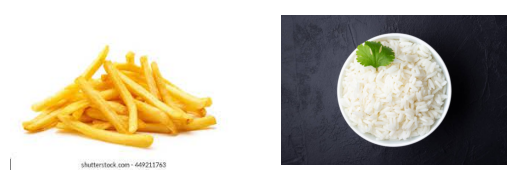

In [77]:

# Use the trained model to make predictions
print('Chips : 0')
print('Rice  : 1')
inp = ['chips','rice']
for j,i in enumerate(inp):
  img = '/content/drive/MyDrive/Data/MLEnd/'+i+'.jpg'
  val_feature = []
  I = plt.imread(img)
  plt.subplot(1,2,j+1)
  plt.imshow(I)
  plt.axis('off')
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  val_feature = np.array([image_feature_extraction(I)])
  predictions_rf = rf_classifier.predict(val_feature)
  predictions_clf = clf.predict(val_feature)
  # Print the predicted class
  # print("Predicted Class RF:", predictions_rf)
  print("Predicted Class SVC:", predictions_clf)

# 8 Results

Based on the results obtained, it is evident that the linear SVC model is capable of predicting whether an image contains rice or chips when provided with new, unseen images.

# 9 Conclusions

Among the two machine learning models compared, the linear Support Vector Classifier (SVC) demonstrated higher accuracy, achieving 67%, compared to the RandomForest model, which reached 64%. The effectiveness of image feature extraction could be further enhanced by employing Convolutional Neural Networks (CNNs) and other neural network techniques, potentially leading to an improvement in overall accuracy.